In [0]:
import pandas as pd
import numpy as np


In [0]:
from google.colab import files
files.upload()

Saving mushrooms.csv to mushrooms (1).csv


{'mushrooms.csv': b'class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\ne,x,f,n,f,n,f,w,b,n,t

In [0]:
data = pd.read_csv("mushrooms.csv")


In [0]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
data.shape

(8124, 23)

In [0]:
# set all columns as categorical
for col in data.columns:
  data[col] = pd.get_dummies(data[col])

In [0]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [0]:
data.shape

(8124, 23)

In [0]:
# x and y
X = data.iloc[:, data.columns!= "class"]
Y = data.iloc[:, data.columns == "class"]


In [0]:
X.shape

(8124, 22)

In [0]:
Y.shape

(8124, 1)

In [0]:
#countplot
import seaborn as sns

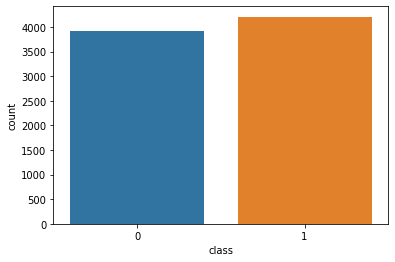

In [0]:
sns.countplot(x="class", data=  data)

In [0]:
#split data
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [0]:
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [0]:
print(accuracy_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

0.9917965545529123
0.9960691823899371
[[1151   15]
 [   5 1267]]


In [0]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,Y_train)
y_preddt = classifier.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix


In [0]:
print(accuracy_score(Y_test,y_preddt))
print(recall_score(Y_test,y_preddt))
print(confusion_matrix(Y_test,y_preddt))

0.9917965545529123
0.9960691823899371
[[1151   15]
 [   5 1267]]


In [0]:
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train,Y_train)
y_predgd = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print(accuracy_score(Y_test,y_predgd))
print(recall_score(Y_test,y_predgd))
print(confusion_matrix(Y_test,y_predgd))

0.9856439704675964
0.9960691823899371
[[1136   30]
 [   5 1267]]


In [0]:
#fittinf svm
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf",random_state = 0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predsvm = classifier.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [0]:
print(accuracy_score(Y_test,y_predsvm))

0.9786710418375718


In [0]:
print(recall_score(Y_test,y_predsvm))

0.9732704402515723


In [0]:
print(confusion_matrix(Y_test,y_predsvm))

[[1148   18]
 [  34 1238]]


In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ypredlog = classifier.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix


In [0]:
print(accuracy_score(Y_test,ypredlog))

0.948318293683347


In [0]:
print(recall_score(Y_test,ypredlog))
print(confusion_matrix(Y_test,ypredlog))

0.9599056603773585
[[1091   75]
 [  51 1221]]
